In [1]:
using PyPlot

In [2]:
function n_potassium(v, v_rest)
    an = (0.1-0.01*(v-v_rest))/(exp(1-0.1*(v-v_rest))-1);
    bn = 0.125*exp((v_rest-v)/80);
    return an,bn
end

n_potassium (generic function with 1 method)

In [3]:
function m_sodium(v,v_rest)
    am = (2.5-0.1*(v-v_rest))/(exp(2.5-0.1*(v-v_rest))-1);
    bm = 4*exp((v_rest-v)/18);
    return am,bm
end

m_sodium (generic function with 1 method)

In [4]:
function h_sodium(v,v_rest)
    ah = 0.07*exp((v_rest-v)/20);
    bh = 1/(1+exp(3-0.1*(v-v_rest)));
    return ah,bh
end

h_sodium (generic function with 1 method)

In [5]:
function HHNeuron(v_rest,totalTime,dt,currAmp,currdur)
    
    v_rest = -65.0;
    dt = 0.01; # ms
    c = 1; # uF/cm2

    # constants
    ENa = 115 + v_rest;
    EK = -6 + v_rest;
    EL = 10.6 + v_rest;

    gNabar = 120;
    gKbar = 36;
    gLbar = 0.3;

    t = 0:dt:totalTime;

    # initialize
    v = [v_rest];

    an,bn = n_potassium(v[end],v_rest);
    am,bm = m_sodium(v[end],v_rest);
    ah,bh = h_sodium(v[end],v_rest);

    n = [an/(an+bn)];
    m = [am/(am+bm)];
    h = [ah/(ah+bh)];
    
    for i = 1:length(t)-1
        an,bn = n_potassium(v[end],v_rest);
        am,bm = m_sodium(v[end],v_rest);
        ah,bh = h_sodium(v[end],v_rest);
    
        gK = gKbar*n[end]^4;
        gNa = gNabar*m[end]^3*h[end];
    
        iK = gK*(v[end]-EK);
        iNa = gNa*(v[end]-ENa);
        iL = gLbar*(v[end]-EL);
    
        if i > currDur[1] && i <currDur[2]
            I = currAmp;
        else
            I = 0;
        end
       
        input = I -(iK + iNa + iL);
    
        push!(v,(v[end]+ input*dt*(1/c)));
        push!(n,(n[end]+ (an*(1-n[end]) - bn*n[end])*dt));
        push!(m,(m[end]+ (am*(1-m[end]) - bm*m[end])*dt));
        push!(h,(h[end]+ (ah*(1-h[end]) - bh*h[end])*dt));
    end
    return t,v
end


HHNeuron (generic function with 1 method)

In [48]:
v_rest = 65.0;
totalTime = 200;
dt = 0.01;
currAmp = 10;
currDur = [100,102]./dt;

t,v = HHNeuron(v_rest,totalTime,dt,currAmp,currDur);


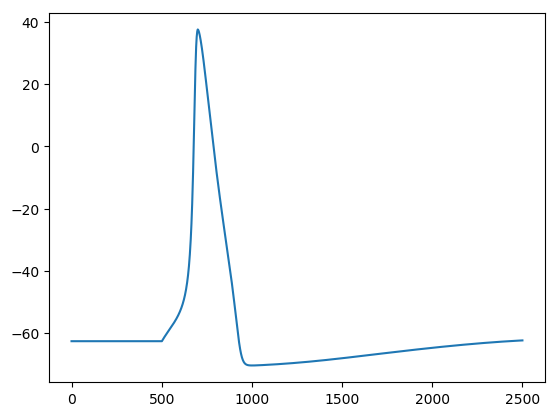

1-element Array{PyCall.PyObject,1}:
 PyObject <matplotlib.lines.Line2D object at 0x7f3f4410ad30>

In [49]:
plot(v[9500:12000])